In [1]:
#import numpy and datascience and formatting as given in example code
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from datascience.predicates import are

 Read in the file Tips.csv as a table

In [2]:
Tips = Table.read_table('Tips.csv')
Tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


MaleTips and FemaleTips are arrays of the tips for males and females respectively The average of each of those are computed and finally a histogram is generated separating groups by sex

C:\Users\C20Eric.Hembling\Documents\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


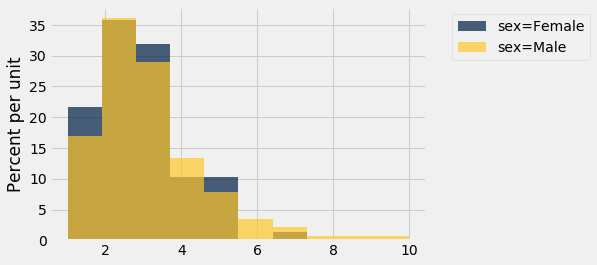

In [3]:
MaleTips = Tips.where('sex','Male').column('tip')
AvgMaleTip = np.mean(MaleTips)
FemaleTips = Tips.where('sex','Female').column('tip')
AvgFemaleTip = np.mean(FemaleTips)
Tips.hist('tip',group = 'sex')

The first cell displays a table of the counts of tips at each meal time. The second cell takes arrays of the tips at dinner and lunch meals respectivey, computes the average tip at each of those times and creates a histogram of the table Tips separated by groups of times

In [4]:
Tips.group('time')

time,count
Dinner,176
Lunch,68


C:\Users\C20Eric.Hembling\Documents\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


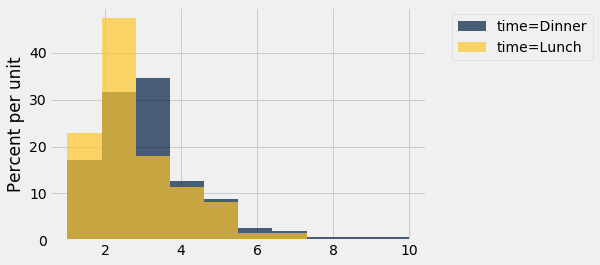

In [5]:
DinnerTips = Tips.where('time','Dinner').column('tip')
AvgDinnerTip = np.mean(DinnerTips)
LunchTips = Tips.where('time','Lunch').column('tip')
AvgLunchTip = np.mean(LunchTips)
Tips.hist('tip',group='time')

The cell below defines a function which converts a string of an abbreviation for a weekday name into a number 1 through 7

In [6]:
def weekday_to_num(weekday):
    num = (1*(weekday=='Mon')+2*(weekday=='Tues')+3*(weekday=='Wed')+4*(weekday=='Thur')+5*(weekday=='Fri')+6*(weekday=='Sat')+7*(weekday=='Sun'))
    return num

The cell below adds a comlumn called weekday_num to the table Tips by running the function weekday_to_num (defined above) on an array of values from the day column of Tips

In [7]:
Tips = Tips.with_column('weekday_num',weekday_to_num(Tips.column('day')))
Tips

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


The cell below defines a function est_tip which takes a bill value and a window and computes the average tip value for bill values within the window value above and below the bill value 

In [8]:
def est_tip(Total_Bill,Window):
    Est_Tip = Tips.where('total_bill',are.between_or_equal_to((Total_Bill-Window), (Total_Bill+Window))).column('tip').mean()
    return Est_Tip

The cell below adds a column to Tips called Estimated_Tip by applying the est_tip function (defined above) to the values in the total_bill column

In [9]:
Tips = Tips.with_column('Estimated_Tip',Tips.apply(est_tip,'total_bill',1))
Tips

total_bill,tip,sex,smoker,day,time,size,weekday_num,Estimated_Tip
16.99,1.01,Female,No,Sun,Dinner,2,7,2.80618
10.34,1.66,Male,No,Sun,Dinner,3,7,1.90276
21.01,3.5,Male,No,Sun,Dinner,3,7,3.19508
23.68,3.31,Male,No,Sun,Dinner,2,7,3.57681
24.59,3.61,Female,No,Sun,Dinner,4,7,3.6575
25.29,4.71,Male,No,Sun,Dinner,4,7,3.67526
8.77,2,Male,No,Sun,Dinner,2,7,1.85483
26.88,3.12,Male,No,Sun,Dinner,4,7,3.72424
15.04,1.96,Male,No,Sun,Dinner,2,7,2.54036
14.78,3.23,Male,No,Sun,Dinner,2,7,2.46231


The cell below creates a scatter plot with the total bill value from each row on the x-axis and the actual and estimated tip values on the y-axis in blue and yellow respectively

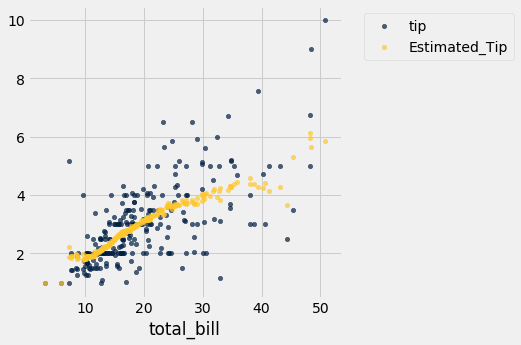

In [10]:
Tips.select(0,1,8).scatter('total_bill')

The two cells below first import the interact function and then define a function called est which computes the average tip values for every total bill value in Tips for any window value and plots a similar scatter plot as above. This was achieved with an idea and help from Dr. Warner.

In [14]:
from ipywidgets import interact

In [15]:
def est(window=1):
    MyTips = Tips.with_column('Estimated_Tip',Tips.apply(lambda x: est_tip(x,window),'total_bill' ))
    MyTips.scatter('total_bill',['tip','Estimated_Tip'])

Finally, the cell below runs the interact function with the est function on window sizes 0.1 to 50.1 to make a interactive scatter plot

In [17]:
interact(est,window=(0.1,50.1,0.1))

interactive(children=(FloatSlider(value=1.0, description='window', max=50.1, min=0.1), Output()), _dom_classes…

<function __main__.est(window=1)>